# Import all dependencies and libraries

In [892]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

# Transform source data to csv

In [873]:
# Importing library
import os

# Getting all the arff files from the current directory
files = [arff for arff in os.listdir('.') if arff.endswith(".arff")]

# Function for converting arff list to csv list
def toCsv(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent

# Main loop for reading and writing files
for file in files:
    with open(file , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name+".csv", "w") as outFile:
            outFile.writelines(new)

# Import data visualize data

In [893]:
df = pd.read_csv("Behavior of the urban traffic - modified.csv") 
print(df.shape)
df.head()
#print(df.tail())

(140, 18)


,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,7:00,0.0,0.0,T,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,7:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,8:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,8:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,9:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1


In [894]:
df.dtypes

Hour                                      object
Immobilized_bus                          float64
Broken_Truck                             float64
Vehicle_excess                            object
Accident_victim                           object
Running_over                              object
Fire_vehicles                             object
Occurrence_involving_freight             float64
Incident_involving_dangerous_freight      object
Lack_of_electricity                      float64
Fire                                     float64
Point_of_flooding                        float64
Manifestations                           float64
Defect_in_the_network_of_trolleybuses     object
Tree_on_the_road                         float64
Semaphore_off                             object
Intermittent_Semaphore                   float64
Slowness_in_traffic_percent              float64
dtype: object

# Data Cleansing 

Check unique values for the given column to understand nature of data (Categorical/Numerical) and missing/empty rows, NA values etc. We will try to fill missing/empty/NA values discard rows and create columns for categorical variables.

#### Exploratory Analysis for Hour

In [926]:
print(df.Hour.unique())
print(df['Hour'].isnull().sum())
print(df['Hour'].empty)

df['Hour']= pd.to_datetime(df['Hour']).dt.time
df['Hour']= df['Hour'].index

['7:00' '7:30' '8:00' '8:30' '9:00' '9:30' '10:00' '10:30' '11:00' '11:30'
 '12:00' '12:30' '13:00' '13:30' '14:00' '14:30' '15:00' '15:30' '16:00'
 '16:30' '17:00' '17:30' '18:00' '18:30' '19:00' '19:30' '20:00']
0
False


#### Exploratory Analysis for Immobilized_bus feature

[0. 2. 1. 4.]
0.0    104
1.0     27
2.0      8
4.0      1
Name: Immobilized_bus, dtype: int64


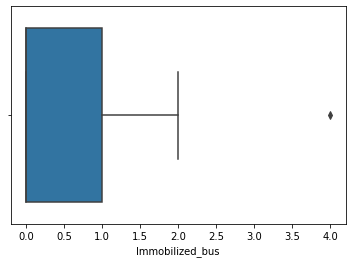

In [896]:
print(df.Immobilized_bus.unique())
print(df['Immobilized_bus'].value_counts(dropna=False))
sns.boxplot('Immobilized_bus', data = df)

In [897]:
df['Immobilized_bus_zero'] = [1 if x ==0.0 else 0 for x in df['Immobilized_bus']]
print(df['Immobilized_bus_zero'].value_counts(dropna=False))
df['Immobilized_bus_one'] = [1 if x ==1.0 else 0 for x in df['Immobilized_bus']]
print(df['Immobilized_bus_one'].value_counts(dropna=False))
df['Immobilized_bus_twoOrMore'] = [1 if x >1.0 else 0 for x in df['Immobilized_bus']]
print(df['Immobilized_bus_twoOrMore'].value_counts(dropna=False))
print(df.columns)

1    104
0     36
Name: Immobilized_bus_zero, dtype: int64
0    113
1     27
Name: Immobilized_bus_one, dtype: int64
0    131
1      9
Name: Immobilized_bus_twoOrMore, dtype: int64
Index(['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Fire_vehicles',
       'Occurrence_involving_freight', 'Incident_involving_dangerous_freight',
       'Lack_of_electricity', 'Fire', 'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore',
       'Slowness_in_traffic_percent', 'Immobilized_bus_zero',
       'Immobilized_bus_one', 'Immobilized_bus_twoOrMore'],
      dtype='object')


#### Exploratory Analysis for Broken_Truck feature

[   0. 1000.    2.    1.    5.    4.    3.]
0.0       66
1.0       44
2.0       17
3.0        6
4.0        5
5.0        1
1000.0     1
Name: Broken_Truck, dtype: int64


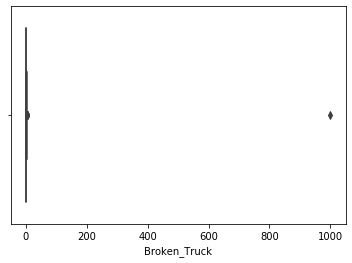

In [898]:
print(df.Broken_Truck.unique())
print(df['Broken_Truck'].value_counts(dropna=False))
sns.boxplot('Broken_Truck', data = df)

In [899]:
df.loc[(df.Broken_Truck ==1000.0),'Broken_Truck']=0.0
df['Broken_Truck_zero'] = [1 if x ==0.0 else 0 for x in df['Broken_Truck']]
print(df['Broken_Truck_zero'].value_counts(dropna=False))
df['Broken_Truck_one'] = [1 if x ==1.0 else 0 for x in df['Broken_Truck']]
print(df['Broken_Truck_one'].value_counts(dropna=False))
df['Broken_Truck_twoOrMore'] = [1 if x >1.0 else 0 for x in df['Broken_Truck']]
print(df['Broken_Truck_twoOrMore'].value_counts(dropna=False))
df.columns

0    73
1    67
Name: Broken_Truck_zero, dtype: int64
0    96
1    44
Name: Broken_Truck_one, dtype: int64
0    111
1     29
Name: Broken_Truck_twoOrMore, dtype: int64


Index(['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Fire_vehicles',
       'Occurrence_involving_freight', 'Incident_involving_dangerous_freight',
       'Lack_of_electricity', 'Fire', 'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore',
       'Slowness_in_traffic_percent', 'Immobilized_bus_zero',
       'Immobilized_bus_one', 'Immobilized_bus_twoOrMore', 'Broken_Truck_zero',
       'Broken_Truck_one', 'Broken_Truck_twoOrMore'],
      dtype='object')

#### Exploratory Analysis for Vehicle_excess feature

In [900]:
print(df.Vehicle_excess.unique())
df.loc[(df.Vehicle_excess == ' f'),'Vehicle_excess']=' F'
print(df.Vehicle_excess.unique())

[' T' ' F' ' f']
[' T' ' F']


0    135
1      5
Name: Vehicle_excess, dtype: int64


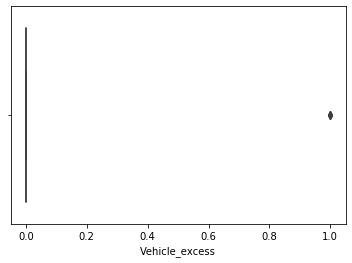

In [901]:
# Converting Yes to 1 and No to 0
df['Vehicle_excess'] = df['Vehicle_excess'].map({' T': 1, ' F': 0})
#df.Vehicle_excess.unique()
#print(df['Vehicle_excess'])
print(df['Vehicle_excess'].value_counts(dropna=False))
sns.boxplot('Vehicle_excess', data = df)

#### Exploratory Analysis for Accident_victim feature

In [902]:
print(df.Accident_victim.unique())
df.loc[(df.Accident_victim == ' -0.0'),'Accident_victim']=' 0.0'
print(df['Accident_victim'].value_counts(dropna=False))

[' 0.0' ' 1.0' ' 2.0' ' 3.0' ' -0.0' ' ']
 0.0    92
 1.0    33
 2.0    10
 3.0     3
         2
Name: Accident_victim, dtype: int64


In [903]:
df['Accident_victim'] = pd.to_numeric(df['Accident_victim'],errors='coerce')
print(df.Accident_victim.unique())
print(df['Accident_victim'].mean())
print(df['Accident_victim'].mode())

[ 0.  1.  2.  3. nan]
0.4492753623188406
0    0.0
dtype: float64


0.0    94
1.0    33
2.0    10
3.0     3
Name: Accident_victim, dtype: int64


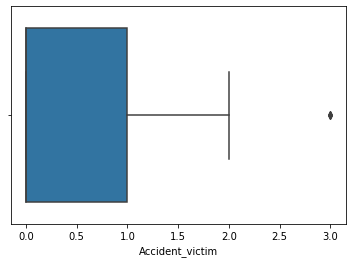

In [904]:
#Replace nan with mode
df['Accident_victim'].replace(np.nan, 0.0 , inplace = True)
df['Accident_victim'] = pd.to_numeric(df['Accident_victim'],errors='coerce')
print(df['Accident_victim'].value_counts(dropna=False))
sns.boxplot('Accident_victim', data = df)

In [905]:
df['Accident_victim_zero'] = [1 if x ==0.0 else 0 for x in df['Accident_victim']]
print(df['Accident_victim_zero'].value_counts(dropna=False))
df['Accident_victim_one'] = [1 if x ==1.0 else 0 for x in df['Accident_victim']]
print(df['Accident_victim_one'].value_counts(dropna=False))
df['Accident_victim_twoOrMore'] = [1 if x >1.0 else 0 for x in df['Accident_victim']]
print(df['Accident_victim_twoOrMore'].value_counts(dropna=False))
print(df.columns)

1    94
0    46
Name: Accident_victim_zero, dtype: int64
0    107
1     33
Name: Accident_victim_one, dtype: int64
0    127
1     13
Name: Accident_victim_twoOrMore, dtype: int64
Index(['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Fire_vehicles',
       'Occurrence_involving_freight', 'Incident_involving_dangerous_freight',
       'Lack_of_electricity', 'Fire', 'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore',
       'Slowness_in_traffic_percent', 'Immobilized_bus_zero',
       'Immobilized_bus_one', 'Immobilized_bus_twoOrMore', 'Broken_Truck_zero',
       'Broken_Truck_one', 'Broken_Truck_twoOrMore', 'Accident_victim_zero',
       'Accident_victim_one', 'Accident_victim_twoOrMore'],
      dtype='object')


#### Exploratory Analysis for Running_over feature

[' 0.0' ' NO' ' 1.0' ' 2.0' ' -1.0']
[' 0.0' ' 1.0' ' 2.0']
 0.0    125
 1.0     14
 2.0      1
Name: Running_over, dtype: int64


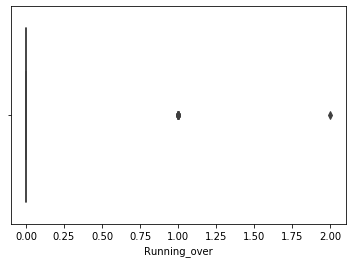

In [906]:
print(df.Running_over.unique())
df.loc[(df.Running_over == ' NO'),'Running_over']=' 0.0'
df.loc[(df.Running_over == ' -1.0'),'Running_over']=' 1.0'
print(df.Running_over.unique())
print(df['Running_over'].value_counts(dropna=False))
df['Running_over'] = pd.to_numeric(df['Running_over'],errors='coerce')
sns.boxplot('Running_over', data = df)

In [908]:
df.loc[(df.Running_over == 2.0),'Running_over']=0.0
print(df['Running_over'].value_counts(dropna=False))
print(df.Running_over.unique())

0.0    126
1.0     14
Name: Running_over, dtype: int64
[0. 1.]


#### Exploratory Analysis for Fire_vehicles feature

 NO     138
 YES      1
 0.0      1
Name: Fire_vehicles, dtype: int64
 NO     139
 YES      1
Name: Fire_vehicles, dtype: int64
0.0    139
1.0      1
Name: Fire_vehicles, dtype: int64


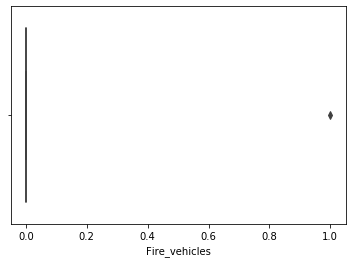

In [909]:
print(df['Fire_vehicles'].value_counts(dropna=False))
#df.replace(to_replace=' 0.0', value= ' NO', inplace = True)
df.loc[(df.Fire_vehicles == ' 0.0'),'Fire_vehicles']=' NO'
print(df['Fire_vehicles'].value_counts(dropna=False))
df.loc[(df.Fire_vehicles == ' NO'),'Fire_vehicles']=' 0.0'
df.loc[(df.Fire_vehicles == ' YES'),'Fire_vehicles']=' 1.0'
df['Fire_vehicles'] = pd.to_numeric(df['Fire_vehicles'],errors='coerce')
print(df['Fire_vehicles'].value_counts(dropna=False))

sns.boxplot('Fire_vehicles', data = df)

#### Exploratory Analysis for Occurrence_involving_freight feature

0.0    139
1.0      1
Name: Occurrence_involving_freight, dtype: int64
0.0    139
1.0      1
Name: Occurrence_involving_freight, dtype: int64


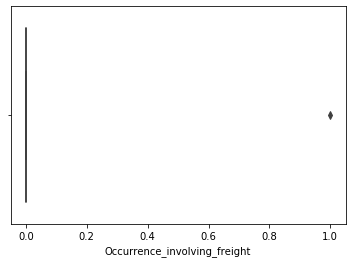

In [910]:
df.Occurrence_involving_freight.unique()
#print(df['Occurrence_involving_freight'])
print(df['Occurrence_involving_freight'].value_counts(dropna=False))
df['Occurrence_involving_freight'] = pd.to_numeric(df['Occurrence_involving_freight'],errors='coerce')
print(df['Occurrence_involving_freight'].value_counts(dropna=False))
sns.boxplot('Occurrence_involving_freight', data = df)

#### Exploratory Analysis for Incident_involving_dangerous_freight feature

0.0    139
1.0      1
Name: Incident_involving_dangerous_freight, dtype: int64
0    0.0
dtype: float64
0    139
1      1
Name: Incident_involving_dangerous_freight, dtype: int64
0    139
1      1
Name: Incident_involving_dangerous_freight, dtype: int64


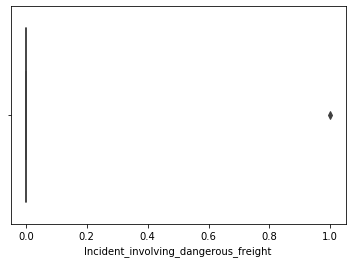

In [912]:
df.Incident_involving_dangerous_freight.unique()
#print(df['Incident_involving_dangerous_freight'])
print(df['Incident_involving_dangerous_freight'].value_counts(dropna=False)) 
print(df['Incident_involving_dangerous_freight'].mode())

df.loc[(df.Incident_involving_dangerous_freight == ' '),'Incident_involving_dangerous_freight']=' 0.0'
print(df['Incident_involving_dangerous_freight'].value_counts(dropna=False))

df['Incident_involving_dangerous_freight'] = pd.to_numeric(df['Incident_involving_dangerous_freight'],errors='coerce')
print(df['Incident_involving_dangerous_freight'].value_counts(dropna=False))

sns.boxplot('Incident_involving_dangerous_freight', data = df)

#### Exploratory Analysis for Lack_of_electricity feature

[0. 1. 2. 4. 3.]
0.0    130
1.0      7
3.0      1
4.0      1
2.0      1
Name: Lack_of_electricity, dtype: int64
0.0    130
1.0     10
Name: Lack_of_electricity, dtype: int64


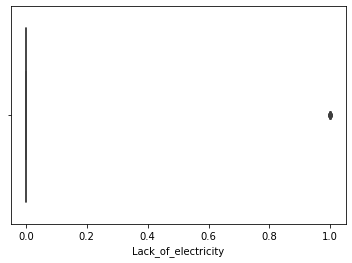

In [913]:
print(df.Lack_of_electricity.unique())
print(df['Lack_of_electricity'].value_counts(dropna=False)) 
df.loc[(df.Lack_of_electricity !=0.0),'Lack_of_electricity']=1.0
print(df['Lack_of_electricity'].value_counts(dropna=False))


sns.boxplot('Lack_of_electricity', data = df)

#### Exploratory Analysis for Fire feature

0.0    139
1.0      1
Name: Fire, dtype: int64


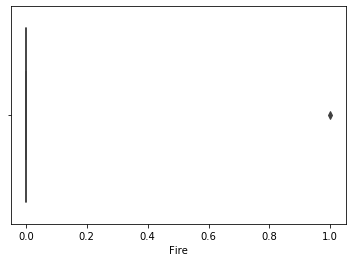

In [914]:
df.Fire.unique()
#print(df['Fire'])
print(df['Fire'].value_counts(dropna=False))
df['Fire'] = pd.to_numeric(df['Fire'],errors='coerce')

sns.boxplot('Fire', data = df)

#### Exploratory Analysis for Point_of_flooding feature

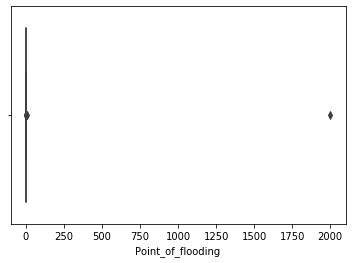

In [915]:
df.Point_of_flooding.unique()
sns.boxplot('Point_of_flooding', data = df)

#### Exploratory Analysis for Manifestations feature

 0.0    133
 1.0      6
-1.0      1
Name: Manifestations, dtype: int64
0.0    133
1.0      7
Name: Manifestations, dtype: int64
0.0    133
1.0      7
Name: Manifestations, dtype: int64


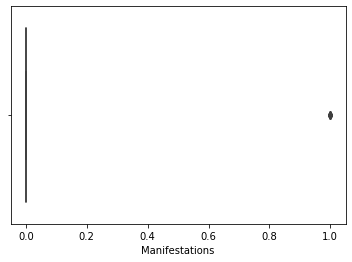

In [917]:
#print(df.Manifestations.unique())
print(df['Manifestations'].value_counts(dropna=False))
#df['Manifestations'].mode()

df.loc[(df.Manifestations == -1.0),'Manifestations']=1.0
print(df['Manifestations'].value_counts(dropna=False))

df['Manifestations'] = pd.to_numeric(df['Manifestations'],errors='coerce')
print(df['Manifestations'].value_counts(dropna=False))

sns.boxplot('Manifestations', data = df)

#### Exploratory Analysis for Defect_in_the_network_of_trolleybuses feature

 0.0    121
 1.0     19
Name: Defect_in_the_network_of_trolleybuses, dtype: int64
<bound method Series.mode of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
135     1.0
136     0.0
137     0.0
138     0.0
139     0.0
Name: Defect_in_the_network_of_trolleybuses, Length: 140, dtype: object>
 0.0    121
 1.0     19
Name: Defect_in_the_network_of_trolleybuses, dtype: int64
0.0    121
1.0     19
Name: Defect_in_the_network_of_trolleybuses, dtype: int64


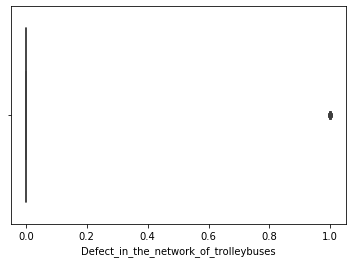

In [920]:
#print(df.Defect_in_the_network_of_trolleybuses.unique())
print(df['Defect_in_the_network_of_trolleybuses'].value_counts(dropna=False))
#Defect_in_the_network_of_trolleybuses feature has 118 occurances as 0.0 and 17 occurances as YES. 2 missing values
#and 1 occurances of 3.0, -8.0 and 2.0. -8 can be considered as outlier.

#This feature also looks categorical and we can represent it as 0.0, YES as 1.0, missing value is replaced with mode
#0.0 is considered as NO and rest of the values as YES
print(df['Defect_in_the_network_of_trolleybuses'].mode)

df.loc[(df.Defect_in_the_network_of_trolleybuses == ' '),'Defect_in_the_network_of_trolleybuses']=' 0.0'
df.loc[(df.Defect_in_the_network_of_trolleybuses == ' YES'),'Defect_in_the_network_of_trolleybuses']=' 1.0'
df.loc[(df.Defect_in_the_network_of_trolleybuses == ' 2.0'),'Defect_in_the_network_of_trolleybuses']=' 1.0'
df.loc[(df.Defect_in_the_network_of_trolleybuses == ' 3.0'),'Defect_in_the_network_of_trolleybuses']=' 1.0'
#Replace outlier with mode 
df.loc[(df.Defect_in_the_network_of_trolleybuses == ' -8.0'),'Defect_in_the_network_of_trolleybuses']=' 0.0'
print(df['Defect_in_the_network_of_trolleybuses'].value_counts(dropna=False))

df['Defect_in_the_network_of_trolleybuses'] = pd.to_numeric(df['Defect_in_the_network_of_trolleybuses'],errors='coerce')
print(df['Defect_in_the_network_of_trolleybuses'].value_counts(dropna=False))

sns.boxplot('Defect_in_the_network_of_trolleybuses', data = df)

#### Exploratory Analysis for  Tree_on_the_road feature

0.0    134
1.0      6
Name: Tree_on_the_road, dtype: int64


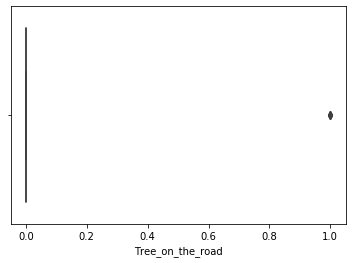

In [921]:
#print(df.Tree_on_the_road.unique())
print(df['Tree_on_the_road'].value_counts(dropna=False))
df['Tree_on_the_road'] = pd.to_numeric(df['Tree_on_the_road'],errors='coerce')
#Tree_on_the_road feature has values 0 and 1 so it's categorical by nature and values are 0 and 1
#so we dont need to create any new feature/s for this.

sns.boxplot('Tree_on_the_road', data = df)

#### Exploratory Analysis for Semaphore_off feature

 0.0    125
 1.0     12
          1
 2.0      1
 4.0      1
Name: Semaphore_off, dtype: int64


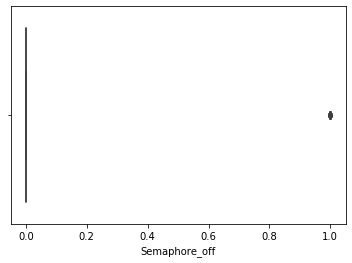

In [922]:
#print(df.Semaphore_off.unique())
print(df['Semaphore_off'].value_counts(dropna=False))
#print(df['Semaphore_off'].mode())
#Semaphore_off has 125 occurances on 0, 12 occurance of YES, 1 occurance of 2.0, 4.0 and 1 missing value. 
#The feature looks like categorical in nature if we consider 0.0 ~ N0, 1.0 ~ YES so we can replace missing value with 
#mode and convert it to numerical with 0.0 as 0.0 and rest of the values as 1.0 and we don't need to create any new 
#feature/column
df.loc[(df.Semaphore_off == ' '),'Semaphore_off']=' 0.0'
df.loc[(df.Semaphore_off == ' YES'),'Semaphore_off']=' 1.0'
df.loc[(df.Semaphore_off == ' 2.0'),'Semaphore_off']=' 1.0'
df.loc[(df.Semaphore_off == ' 4.0'),'Semaphore_off']=' 1.0'
#print(df.Semaphore_off.unique())
df['Semaphore_off'] = pd.to_numeric(df['Semaphore_off'],errors='coerce')
#print(df.Semaphore_off.unique())

sns.boxplot('Semaphore_off', data = df)

#### Exploratory Analysis for Intermittent_Semaphore feature

0.0    138
1.0      2
Name: Intermittent_Semaphore, dtype: int64


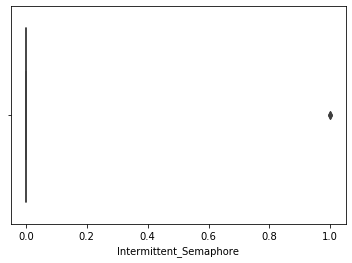

In [923]:
#print(df.Intermittent_Semaphore.unique())
print(df['Intermittent_Semaphore'].value_counts(dropna=False))
#Transform values to numeric values
df['Intermittent_Semaphore'] = pd.to_numeric(df['Intermittent_Semaphore'],errors='coerce')
#Intermittent_Semaphore feature has values 0 and 1 so it's categorical by nature and values are 0 and 1
#so we dont need to create any new feature/s for this.

sns.boxplot('Intermittent_Semaphore', data = df)

# Feature Subset Selection

#### Frequency distribution of Slowness_in_traffic_percent

In [927]:
#df.columns

Index(['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Fire_vehicles',
       'Occurrence_involving_freight', 'Incident_involving_dangerous_freight',
       'Lack_of_electricity', 'Fire', 'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore',
       'Slowness_in_traffic_percent', 'Immobilized_bus_zero',
       'Immobilized_bus_one', 'Immobilized_bus_twoOrMore', 'Broken_Truck_zero',
       'Broken_Truck_one', 'Broken_Truck_twoOrMore', 'Accident_victim_zero',
       'Accident_victim_one', 'Accident_victim_twoOrMore'],
      dtype='object')

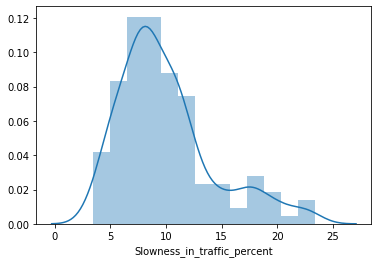

In [924]:
sns.distplot(df['Slowness_in_traffic_percent']);

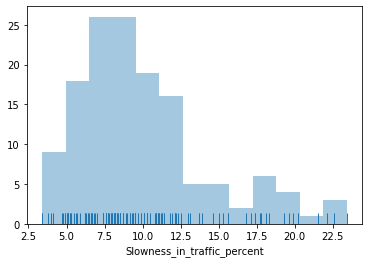

In [925]:
sns.distplot(df['Slowness_in_traffic_percent'], kde=False, rug=True);

### RFE

In [938]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
dff = df 
X = dff.drop(['Slowness_in_traffic_percent'], axis = 1) 
y = df['Slowness_in_traffic_percent']

lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y)

# Create the sbs object and select best 10 features
knn = KNeighborsClassifier(n_neighbors=10)
# the param forward when set to False will do sequential backward selection
sbs = SFS(knn,
           k_features=10,
           forward=False,
           scoring='accuracy')

sbs = sbs.fit(X, y_encoded)
print("Best10 features: ",sbs.k_feature_idx_)
print(dff.columns)

Best10 features:  (1, 2, 4, 11, 17, 20, 21, 22, 23, 24)
Index(['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Fire_vehicles',
       'Occurrence_involving_freight', 'Incident_involving_dangerous_freight',
       'Lack_of_electricity', 'Fire', 'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore',
       'Slowness_in_traffic_percent', 'Immobilized_bus_zero',
       'Immobilized_bus_one', 'Immobilized_bus_twoOrMore', 'Broken_Truck_zero',
       'Broken_Truck_one', 'Broken_Truck_twoOrMore', 'Accident_victim_zero',
       'Accident_victim_one', 'Accident_victim_twoOrMore'],
      dtype='object')


### Chi-Sqaured

In [940]:
df2 = df
pdf = pd.DataFrame()
pdf['Slowness_in_traffic_class'] = pd.cut(df2.Slowness_in_traffic_percent, bins=15, labels=np.arange(15), right=False)
#print(pdf)
from sklearn.feature_selection import chi2
X = X
y = pdf
chi2_scores, p_values = chi2(X,y)
print("Chi-2 Scores",chi2_scores)
print("p values",p_values)

Chi-2 Scores [7.38392298e+02 1.68909418e+01 2.42895826e+01 2.27538462e+01
 1.58404745e+01 8.75395193e+00 2.23333333e+01 1.17272727e+01
 5.66666667e+00 4.74844920e+01 3.11764706e+00 1.78277606e+04
 2.44540362e+01 8.05977614e+00 6.82458065e+00 2.88698752e+01
 1.66666667e+01 4.95190330e+00 2.17928963e+01 1.30415619e+01
 7.95057825e+00 6.34761228e+00 1.02838007e+01 4.87196992e+00
 9.78996464e+00 1.02222046e+01]
p values [1.63476918e-148 2.62036216e-001 4.22637311e-002 6.43948609e-002
 3.23213149e-001 8.46482053e-001 7.20197595e-002 6.28194499e-001
 9.74206748e-001 1.59945391e-005 9.98847270e-001 0.00000000e+000
 4.03557109e-002 8.86188605e-001 9.41262601e-001 1.08821106e-002
 2.74376713e-001 9.86470840e-001 8.29711366e-002 5.23253623e-001
 8.91884848e-001 9.56954984e-001 7.41153980e-001 9.87515850e-001
 7.77372565e-001 7.45763995e-001]


# Model building and testing